# DSCI 100: Personal Planning Stage for Group Project

In [2]:
# imports
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Description: players.csv
- Number of observations: 196
- Summary Statistics:
    - played_hours:
        - Min: 0.00
        - Median: 0.10
        - Mean: 5.85
        - Max: 223.10
    - Age:
        - Min: 9.00
        - Median: 19.00
        - Mean: 21.14
        - Max: 58.00
    - subscribe:
        - FALSE: 52
        - TRUE: 144
- Number of variables: 7
    - experience: Categorical/Ordinal (character)
        - How much experience a player has playing Minecraft
    - subscribe: Categorical/Binary (logical)
        - Whether or not a player is subscribed to a game-related newsletter
    - hashedEmail: Categorical (character)
        - A player's email, hashed/encrypted for privacy and/or storage reasons
    - played_hours: Numerical (double)
        - How many hours a player played on the PlaiCraft server over the course of the data collection
    - name: Categorical (character)
        - The name of a player
    - gender: Categorical (character)
        - The gender of a player (male, female, agender, two-spirited, prefer not to say, etc)
    - Age: Numerical (double)
        - The age of a player
- Issues in the data:
    - Age variable contains 2 NAs, will require imputation
    - Imbalanced, as well as generally a poor spread of data (e.g. a lot of players have 0 played hours)
- Potentially irrelevant variables:
    - Name
    - hashedEmail
    - gender (this one depends, only due to certain societal norms)

In [11]:
data <- read_csv("data/players.csv")
summary(data)
head(data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Questions:
- Broad question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
- Specific question: Is experience a good predictor for played_hours, or is it only relevant in the context of age?
- How the data will help address this question:
    - We can look at the effects of using only age or experience as a predictor for played_hours, then look at how that differs from using both as predictors simultaneously. Intuitively speaking, the more experience you have, the less you need to play. The less experience you have, the more you need to play. But, that can also be reversed (more experience needs more hours to be competitive, less experience gets discouraged quickly). Finally, age ultimately determines how much free time you can dedicate to Minecraft.
- Data wrangling plans:
    - In terms of wrangling, players.csv looks quite tidy. All the players' information is contained within a row, each cell only measures one thing, and each column represents one distinct variable. Thus, I believe that no wrangling will be required to apply one of the predictive methods from class.

## EDA and Visualization:
- Loading dataset: See Data Description section
- Wrangling data: See Questions section
- Compute mean values for players.csv: See Data Description section
| Variable | Mean |
|----------|----------|
| played_hours | 5.85 |
| Age    | 21.14  |

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


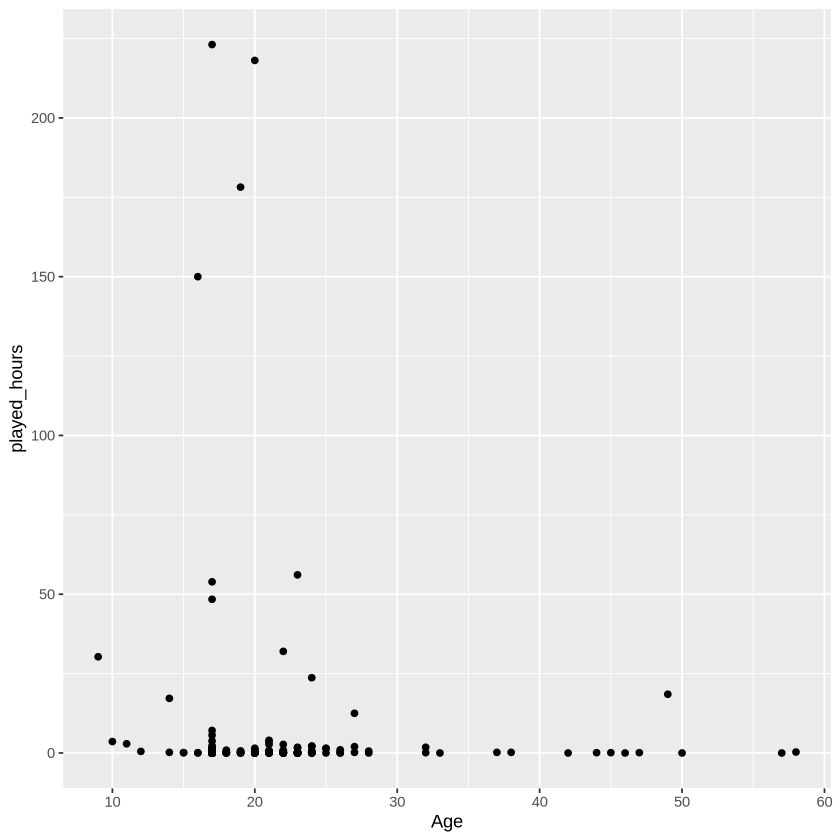

In [15]:
age_plot <- data |>
            ggplot(aes(x = Age, y = played_hours)) +
            geom_point() +
            labs()
age_plot

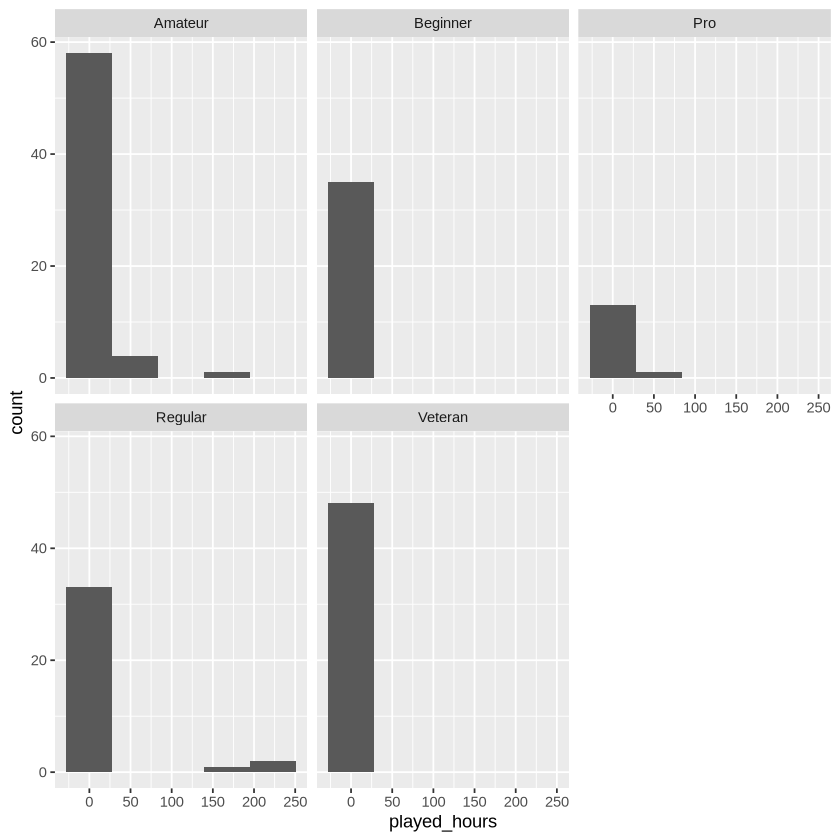

In [22]:
exp_plot <- data |>
            ggplot(aes(x=played_hours)) + 
            geom_histogram(bins = 5) +
            facet_wrap(~ experience) +
            labs()
exp_plot

## Methods and Plan: